# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 12 - Random Forest**
---

In [5]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ======================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ===============================
from tqdm import tqdm

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# =======================
import warnings
warnings.filterwarnings('once')

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).  
En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:  
- Ajustar el modelo a un Random Forest  
- Extraer las métricas  
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)  

In [6]:
# cargamos el dataset
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
country,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


In [7]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'region', 'restaurant_price_index'], axis = 1)
y = df["restaurant_price_index_normal"]

In [8]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# creamos un diccionario con los hiperparámetros que queremos probar, los mismos que en el decisin tree
param = {"max_depth": [2, 4, 6], 
        "max_features": [1, 2, 3, 4],
        "min_samples_split": [10, 15, 20],
        "min_samples_leaf": [10, 15, 20],
        "random_state": [99]} 

In [10]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [11]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [99]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [12]:
# sacamos cual es nuestro mejor bosque
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=2, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=99)

In [13]:
# realizamos las predicciones
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [14]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
rf_results = spf.metricas_rlin(y_test, y_pred_test_rf, y_train, y_pred_train_rf, "Random Forest I")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I


In [15]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_LR_DT_results = pd.read_csv("datos/soci_econ_country_profiles_metricas_DT.csv", index_col = 0)
df_LR_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.154444,0.034332,0.185289,0.891354,test,Regresion Lineal-todas VP
1,0.124807,0.022621,0.150403,0.938699,train,Regresion Lineal-todas VP
0,0.200268,0.055097,0.234727,0.784694,test,Regresion Lineal-ANOVA
1,0.145094,0.033317,0.182529,0.913887,train,Regresion Lineal-ANOVA
0,0.237572,0.088985,0.298304,0.718399,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


In [16]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo
df_todos_resultados = pd.concat([rf_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I
0,0.154444,0.034332,0.185289,0.891354,test,Regresion Lineal-todas VP
1,0.124807,0.022621,0.150403,0.938699,train,Regresion Lineal-todas VP
0,0.200268,0.055097,0.234727,0.784694,test,Regresion Lineal-ANOVA
1,0.145094,0.033317,0.182529,0.913887,train,Regresion Lineal-ANOVA
0,0.237572,0.088985,0.298304,0.718399,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


In [17]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,cost_of_living,0.252826
3,employment_services,0.185771
16,region_map,0.100482
15,international_migrant_stock,0.097393
1,employment_agriculture,0.092974
6,purchasing_power_index,0.069290
10,human_capital_index,0.059538
12,urban_population,0.056016
2,employment_industry,0.039401
9,consumer_price_index,0.019238


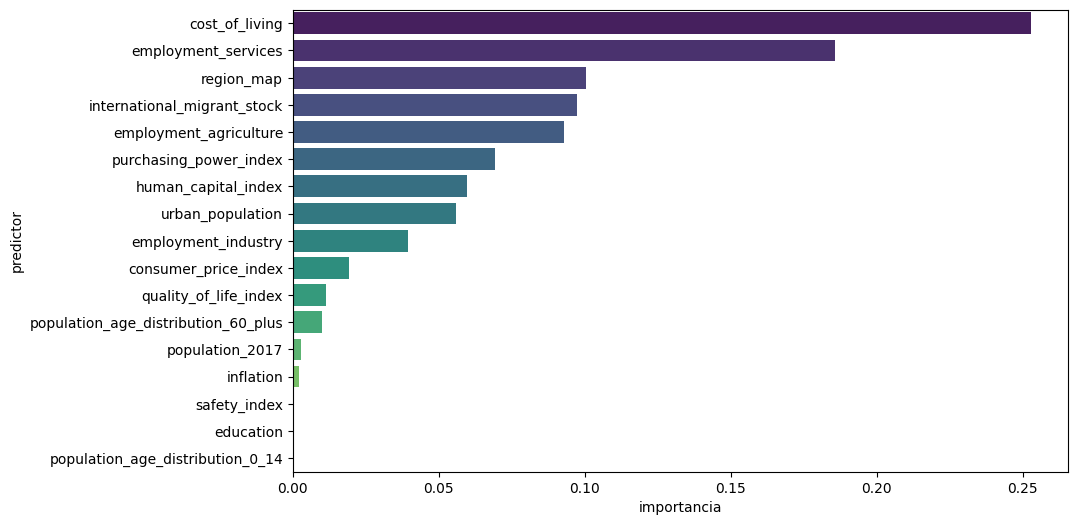

In [18]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [19]:
# probamos otro modelo
param2 = {"max_depth": [2,4, 6], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 15, 20],
        "min_samples_leaf": [10, 15, 20],
        "random_state": [98]} 

In [20]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param2,
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [21]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [98]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [22]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 
bosque2 = gs_rf2.best_estimator_
bosque2

RandomForestRegressor(max_depth=2, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=98)

In [23]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [24]:
rf_results2 = spf.metricas_rlin(y_test, y_pred_test_rf2, y_train, y_pred_train_rf2, "Random Forest II")
rf_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.206193,0.069549,0.263722,0.779905,test,Random Forest II
1,0.235140,0.084927,0.291422,0.769858,train,Random Forest II


In [25]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo
df_todos_resultados = pd.concat([rf_results2, df_todos_resultados], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.206193,0.069549,0.263722,0.779905,test,Random Forest II
1,0.235140,0.084927,0.291422,0.769858,train,Random Forest II
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I
0,0.154444,0.034332,0.185289,0.891354,test,Regresion Lineal-todas VP
1,0.124807,0.022621,0.150403,0.938699,train,Regresion Lineal-todas VP
0,0.200268,0.055097,0.234727,0.784694,test,Regresion Lineal-ANOVA
1,0.145094,0.033317,0.182529,0.913887,train,Regresion Lineal-ANOVA
0,0.237572,0.088985,0.298304,0.718399,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I


CONCLUSIÓN:
- Los datos sugieren que el modelo más adecuado es Random Forest I por las siguientes razones:
    - El R2 del Decision tree II para el test es mayor pero la diferencia respecto al R2 del train es considerablemente superior a la de los modelos Random Forest I y II. Además, los valores de los residuos del train de Decision Tree II son mayores que los otros modelos.
    - Las métricas de los dos modelos de Random Forest son bastante buenas (residuos bajos y R2 superiores a 0.7) y muy parecidas. Ambos podrían ser adecuados y más estables que el de Decision Tree II, ya que tienen muy poca diferencia entre las métricas de train y de test.
    - Las métricas del modelo Random Forest I son ligeramente mejores (R2 mayor y residuos menores) que las de Random Forest II, por lo que los datos sugieren que sería el mejor modelo de los realizados. 

In [26]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores2 = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores2.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores2

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,employment_services,0.221123
1,employment_agriculture,0.164358
8,cost_of_living,0.151302
15,international_migrant_stock,0.143708
16,region_map,0.103532
5,quality_of_life_index,0.056152
6,purchasing_power_index,0.049073
10,human_capital_index,0.034568
11,inflation,0.018682
4,education,0.016046


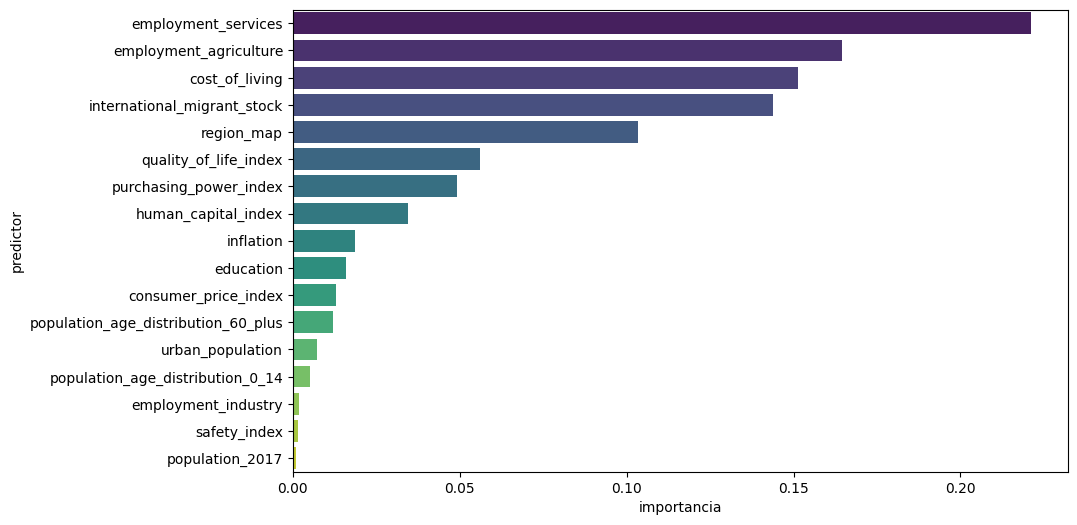

In [27]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores2, palette="viridis");
plt.show()

Si analizamos la importancia de las variables en ambos modelos de tipo Random Forest cabe destacar que, a pesar de tener métricas muy diferentes, hay mucha variación entre la importancia de las variables en uno y otro modelo, tanto entre las más importantes (cost of living por ejemplo) como entre las menos importantes (education por ejemplo)